<a href="https://colab.research.google.com/github/gencturkmert/asap/blob/main/BCW_Model_Parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

Data Preprocessing

In [114]:
df = pd.read_csv("../content/bcw.csv",header = 0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [115]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [116]:
X = df.drop('diagnosis', axis =1)
Y = df["diagnosis"]

train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.2, shuffle = True, random_state = 42)


In [74]:
print(len(train_x))

364


Model Building, and training with different batch sizes and epochs

In [125]:
batch_sizes = [8,16]
learning_rates = [0.01,0.001, 0.0001, 0.00001]
results = []
histories = []

for batch_size in batch_sizes:
    for lr in learning_rates:
        callback = EarlyStopping( patience=10, mode ="min", monitor = "val_loss")
        opt = Adam(learning_rate=lr)

        model = Sequential([
                    Dense(16, activation='relu', input_dim=30),
                    Dense(8, activation='relu'),
                    Dense(8, activation = 'relu'),
                    Dense(1, activation='sigmoid')
                ])
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

        history = model.fit(train_x, train_y, batch_size=batch_size,epochs = 200, validation_split = 0.1, callbacks=[callback],verbose = 0)
        histories.append(history)

        result = {
            'batch_size': batch_size,
            'learning_rate': lr,
            'val_loss': min(history.history['val_loss']),
            'val_accuracy': max(history.history['val_accuracy']),
            'loss': history.history['loss'][-1],
            'accuracy': history.history['accuracy'][-1],
            'epochs': len(history.history['loss'])
        }
        results.append(result)



In [126]:
resultsDf = pd.DataFrame(results)
best_setting = resultsDf.loc[resultsDf['val_loss'].idxmin()]

print("Model infos")
print(resultsDf)
print("Best setting according to validation loss:")
print(best_setting)

Model infos
   batch_size  learning_rate  val_loss  val_accuracy      loss  accuracy  \
0           8        0.01000  0.283643      0.913043  0.173195  0.933985   
1           8        0.00100  0.294853      0.913043  0.232955  0.907090   
2           8        0.00010  0.238692      0.913043  0.198965  0.931540   
3           8        0.00001  0.468654      0.847826  0.472654  0.801956   
4          16        0.01000  0.321193      0.891304  0.253394  0.919315   
5          16        0.00100  0.284598      0.891304  0.201092  0.931540   
6          16        0.00010  0.311683      0.891304  0.187232  0.929095   
7          16        0.00001  1.645341      0.695652  1.214590  0.486553   

   epochs  
0      24  
1      32  
2     153  
3     200  
4      64  
5      29  
6     191  
7     200  
Best setting according to validation loss:
batch_size         8.000000
learning_rate      0.000100
val_loss           0.238692
val_accuracy       0.913043
loss               0.198965
accuracy    

Best setting according to validation loss:
batch_size         8.000000
learning_rate      0.000100
val_loss           0.238692
val_accuracy       0.913043
loss               0.198965
accuracy           0.931540
epochs           153.000000
Name: 2, dtype: float64


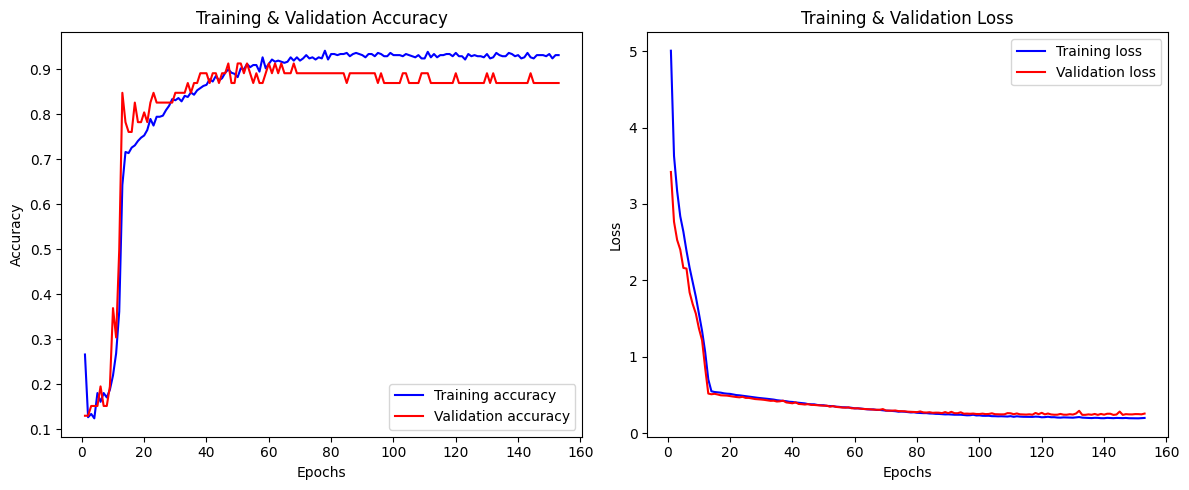

In [127]:
# After finding the best setting
best_setting_index = resultsDf['val_loss'].idxmin()
best_setting = resultsDf.loc[best_setting_index]

print("Best setting according to validation loss:")
print(best_setting)

# Plotting metrics for the best setting
best_history = histories[best_setting_index]
epochs = range(1, len(best_history.history['loss']) + 1)

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(epochs, best_history.history['accuracy'], 'b', label='Training accuracy')
plt.plot(epochs, best_history.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, best_history.history['loss'], 'b', label='Training loss')
plt.plot(epochs, best_history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()